In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [2]:
file_train = 'D:/Work/DAandML/Titanic_Project/train.csv'
file_test = 'D:/Work/DAandML/Titanic_Project/test.csv'

In [3]:
data_train = pd.read_csv(file_train)
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data_train.describe()

C:\Users\anhnt109\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_train[['Sex','Age','Embarked']].head(3)

,Sex,Age,Embarked
0,male,22.0,S
1,female,38.0,C
2,female,26.0,S


In [7]:
data_train[data_train['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [8]:
data_train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [9]:
SextoGender = {'male':1, 'female':0}

In [10]:
data_train['Gender'] = data_train['Sex'].map(SextoGender)

In [11]:
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [12]:
data_train['Gender'].dtypes

dtype('int64')

In [13]:
data_train['AgeFill'] = data_train['Age']

In [14]:
data_train[data_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(5)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN


In [15]:
# Calculate mean of Age according to Gender and Pclass
medianAge = np.zeros((2,3))
for i in range(0,2):
    for j in range(0,3):
        medianAge[i, j] = data_train[(data_train['Gender'] == i) & \
                            (data_train['Pclass'] == j+1)]['Age'].dropna().median()
medianAge

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [16]:
data_train[data_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(3)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN


In [17]:
for i in range(0,2):
    for j in range(0, 3):
        data_train.loc[(data_train['Age'].isnull()) & 
                       (data_train['Pclass'] == j+1) & (data_train['Gender'] == i),'AgeFill'] = medianAge[i, j]

In [18]:
data_train[data_train['Age'].isnull()][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [19]:
data_train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [20]:
data_train['AgeIsNull'] = pd.isnull(data_train['Age']).astype(int)

In [21]:
data_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,AgeIsNull
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1,27.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,19.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0,21.5,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,26.0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,32.0,0


In [22]:
data_train['FamilySize'] = data_train['SibSp'] + data_train['Parch']
data_train['Age*Class'] = data_train.AgeFill * data_train.Pclass
data_train_use = data_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data_train_use.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,1,0,3,22.0,1,0,7.2500,1,22.0,0,1,66.0
1,2,1,1,38.0,1,0,71.2833,0,38.0,0,1,38.0
2,3,1,3,26.0,0,0,7.9250,0,26.0,0,0,78.0
3,4,1,1,35.0,1,0,53.1000,0,35.0,0,1,35.0
4,5,0,3,35.0,0,0,8.0500,1,35.0,0,0,105.0


In [23]:
data_train_use = data_train_use.drop('Age', axis=1)

In [24]:
data_train_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Gender         891 non-null int64
AgeFill        891 non-null float64
AgeIsNull      891 non-null int32
FamilySize     891 non-null int64
Age*Class      891 non-null float64
dtypes: float64(3), int32(1), int64(7)
memory usage: 73.2 KB


In [25]:
data_train_use = data_train_use.drop('PassengerId', axis=1)

In [26]:
data_train_use.describe()

,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,0.647587,29.112424,0.198653,0.904602,62.614860
std,0.486592,0.836071,1.102743,0.806057,49.693429,0.477990,13.304424,0.399212,1.613459,31.362024
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.920000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,21.500000,0.000000,0.000000,40.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000,26.000000,0.000000,0.000000,63.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,36.000000,0.000000,1.000000,75.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,80.000000,1.000000,10.000000,222.000000


In [28]:
data_train_use.to_csv('data_train_use.csv', index=False)

In [27]:
#plt.figure(figsize=(15, 10))

In [ ]:
plt.boxplot(data_train_use['Fare'])

In [ ]:
sb.boxplot(data_train_use)

In [ ]:
data_train_1 = data_train_use.loc[(data_train_use['Fare'] < 100) & (data_train_use['Age*Class'] < 200)]
data_train_1.info()

In [ ]:
train_data = data_train_use.values

In [ ]:
train_data.shape

In [28]:
data_train_use.head(3)

,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,0,3,1,0,7.2500,1,22.0,0,1,66.0
1,1,1,1,0,71.2833,0,38.0,0,1,38.0
2,1,3,0,0,7.9250,0,26.0,0,0,78.0


In [76]:
data1 = data_train_use.loc[:,['Survived','Gender', 'Pclass','Fare']]
data1.head(3)

,Survived,Gender,Pclass,Fare
0,0,1,3,7.2500
1,1,0,1,71.2833
2,1,0,3,7.9250


In [77]:
train_data = data1.values
train_data.shape

(891L, 4L)

In [44]:
data_test = data_train_use.iloc[:,:]
data_test.head(3)

,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,0,3,1,0,7.2500,1,22.0,0,1,66.0
1,1,1,1,0,71.2833,0,38.0,0,1,38.0
2,1,3,0,0,7.9250,0,26.0,0,0,78.0


In [45]:
data_test = data_test.drop(['AgeIsNull', 'SibSp','FamilySize'], axis=1)

In [28]:
import seaborn as sb

In [30]:
%matplotlib inline

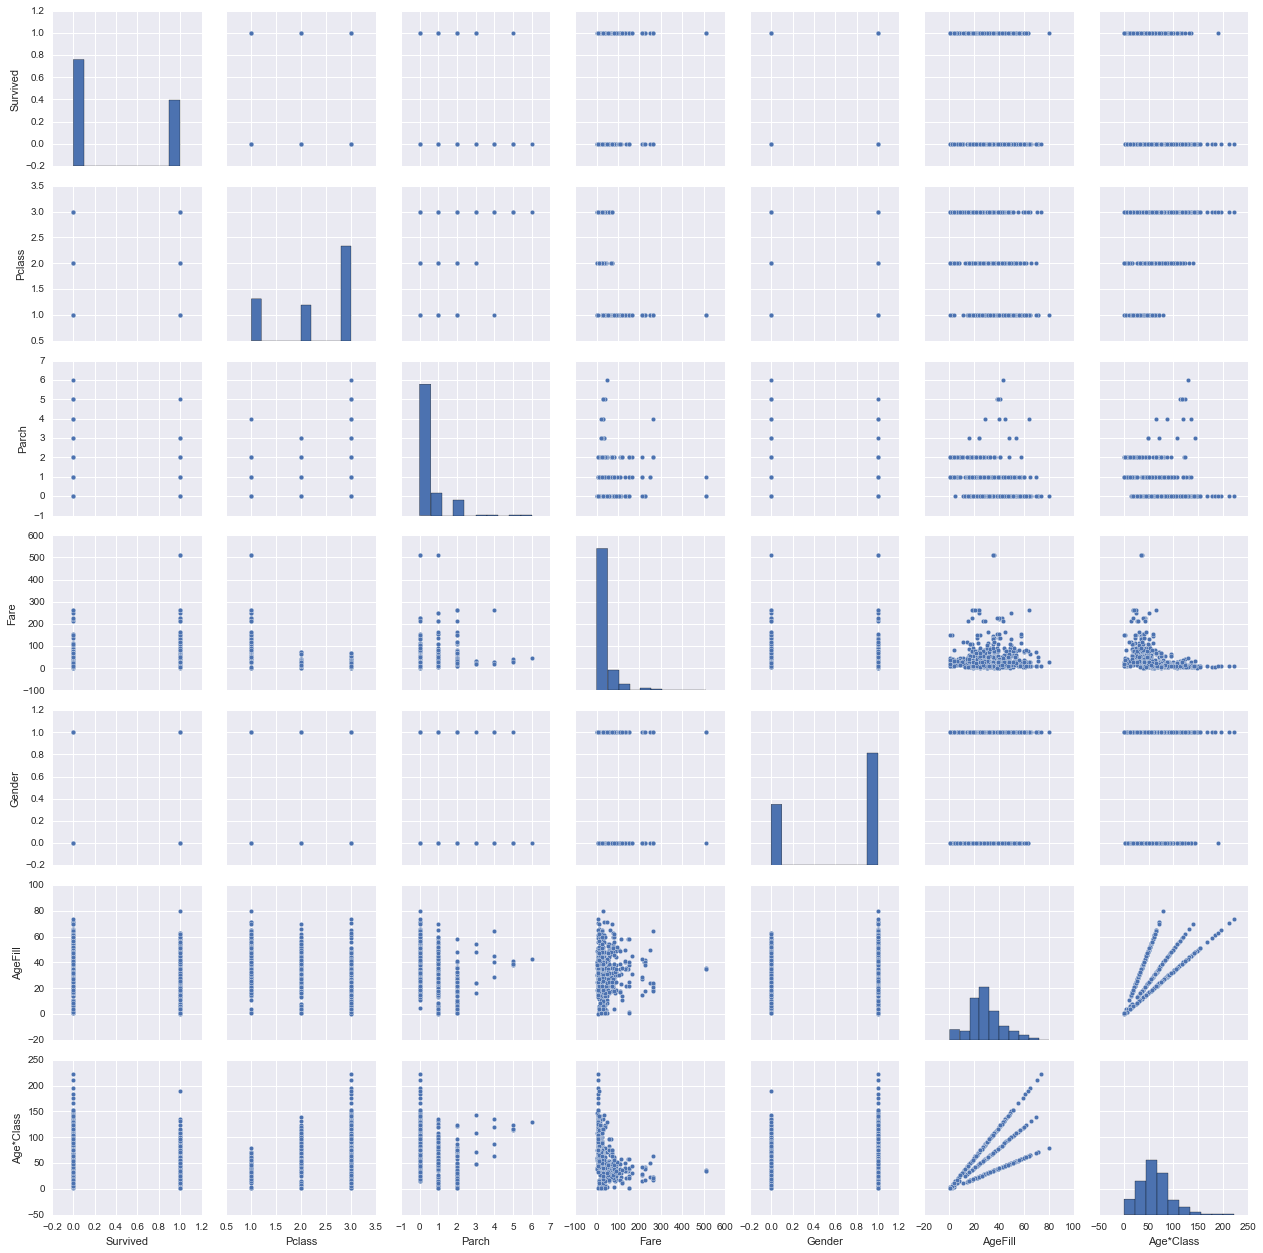

In [46]:
sb.pairplot(data_test)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)

In [43]:
data_train_use_pca = pca.fit_transform(data_train_use.iloc[:,1:10])
data_train_use_pca.shape

(891L, 2L)

In [44]:
type(data_train_use_pca)

numpy.ndarray

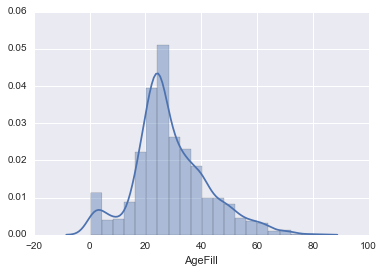

In [50]:
#sb.barplot(data_train_use['AgeFill'], data_train_use['Survived'])
sb.distplot(data_train_use['AgeFill'], bins=20)

In [42]:
train_data = pd.cdata_train_use_pca[:,0]
train_data.shape

(891L, 2L)

In [31]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn import tree
from sklearn import neighbors

In [78]:
clf = RandomForestClassifier()
#clf = GradientBoostingClassifier()
#clf = GradientBoostingRegressor(n_estimators=128, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')
#clf = svm.SVC()
#clf = svm.LinearSVC()
#clf = tree.DecisionTreeClassifier()
#clf = tree.DecisionTreeRegressor()
#clf = neighbors.KNeighborsClassifier()
from sklearn.grid_search import GridSearchCV

In [47]:
train_data = data_test.values

In [76]:
#empty

In [1049]:
# feature selection for train_data

#from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#train_data = sel.fit_transform(train_data)

In [33]:
from sklearn.cross_validation import StratifiedKFold
parameter_grid = {'n_estimators': [5, 10, 25, 50, 75, 100],
                  'criterion': ['gini', 'entropy'],
                  'warm_start': [True, False]}

#parameter_grid = {'C': [1],
#                  'loss': ['squared_hinge'],
#                  'dual': [True, False]}

#parameter_grid = {'n_neighbors': [1, 2, 3, 5, 7],
#                  'leaf_size': [20, 25, 30, 35],
#                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

#parameter_grid = {'loss': ['deviance', 'exponential'],
#                  'n_estimators': [100, 125, 150, 200],
#                  'max_depth': [2, 3, 5, 6, 7]}

cross_validation = StratifiedKFold(train_data[0::,0], n_folds=10)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_data[0::,1::], train_data[0::,0])
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.818181818182
Best parameters: {'n_estimators': 10, 'warm_start': True, 'criterion': 'gini'}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

In [79]:
#forest = forest.fit(train_data[0::,1::], train_data[0::,0])
#clf = clf.fit(train_data[0::,1::], train_data[0::,0])
#clf = clf.fit(train_data[0::,1::], train_data[0::,0])
clf = RandomForestClassifier()
#clf = svm.LinearSVC(C=1, dual=False, loss='squared_hinge')
#clf = GradientBoostingClassifier(n_estimators= 100, loss= 'deviance', max_depth= 5)
clf = clf.fit(train_data[0::,1::], train_data[0::,0])

In [76]:
#clf_best = clf_best.fit(train_data[0::,1::], train_data[0::,0])

In [80]:
#clf_best.score(train_data[0::,1::], train_data[0::,0])
clf.score(train_data[0::,1::], train_data[0::,0])

0.89562289562289565

In [95]:
from sklearn.feature_selection import RFE

In [97]:
data_test.head(2)

,Survived,Pclass,Parch,Fare,Gender,AgeFill,Age*Class
0,0,3,0,7.2500,1,22.0,66.0
1,1,1,0,71.2833,0,38.0,38.0


In [96]:
selector = RFE(clf, n_features_to_select=3)
selector = selector.fit(train_data[0::,1::], train_data[0::,0])
print(selector.support_)
print(selector.ranking_)

[False False  True  True False  True]
[3 4 1 1 2 1]


In [103]:
data_afterRFE = data_test.loc[:,['Survived', 'Fare','Gender','Age*Class']]
data_afterRFE.columns

Index([u'Survived', u'Fare', u'Gender', u'Age*Class'], dtype='object')

In [104]:
train_data_afterRFE = data_afterRFE.values
train_data_afterRFE.shape

(891L, 4L)

In [129]:
parameter_grid = {'n_estimators': [5, 10, 25, 50, 75, 100],
                  'criterion': ['gini', 'entropy'],
                  'warm_start': [True, False]}
clf = RandomForestClassifier()
cross_validation = StratifiedKFold(train_data_afterRFE[0::,0], n_folds=10)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_data_afterRFE[0::,1::], train_data_afterRFE[0::,0])
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.794612794613
Best parameters: {'n_estimators': 100, 'warm_start': True, 'criterion': 'gini'}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

In [130]:
clf = RandomForestClassifier(n_estimators=100, warm_start= True, criterion='gini')
clf = clf.fit(train_data_afterRFE[0::,1::],train_data_afterRFE[0::,0])
print clf.score(train_data_afterRFE[0::,1::],train_data_afterRFE[0::,0])

0.976430976431


In [36]:
test_data = pd.read_csv(file_test, header=0)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
#train_data[0::,1::].shape

(891L, 2L)

In [1054]:
# Take the same decision trees and run it on the test data
# output = forest.predict(train_data[0::,1::])
#output = boosting.predict(train_data[0::,1::])

In [1055]:
#pd.crosstab(output, train_data[0::,0])

In [1056]:
#boosting

In [80]:
data_train_use.head()

,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,0,3,1,0,7.2500,1,22.0,0,1,66.0
1,1,1,1,0,71.2833,0,38.0,0,1,38.0
2,1,3,0,0,7.9250,0,26.0,0,0,78.0
3,1,1,1,0,53.1000,0,35.0,0,1,35.0
4,0,3,0,0,8.0500,1,35.0,0,0,105.0


In [81]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [37]:
test_data['Gender'] = test_data['Sex'].map(SextoGender)

In [60]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1


In [38]:
test_median = np.zeros((2, 3))

for i in range(0, 2):
    for j in range(0, 3):
        test_median[i, j] = test_data[(test_data['Gender'] == i) &
                                   (test_data['Pclass'] == j+1)].Age.dropna().median()
test_median
test_data['AgeFill'] = test_data['Age']

In [39]:
for i in range(0, 2):
    for j in range(0, 3):
        test_data.loc[(test_data['Age'].isnull()) & 
                       (test_data['Pclass'] == j+1) & (test_data['Gender'] == i),'AgeFill'] = test_median[i, j]

test_data[test_data['Age'].isnull()].head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,1,24.0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,0,41.0
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,1,24.0


In [40]:
test_data['AgeIsNull'] = pd.isnull(test_data['Age']).astype(int)

In [66]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,AgeFill,AgeIsNull
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,34.5,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,47.0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,62.0,0


In [47]:
data_train_use.columns

Index([u'Survived', u'Pclass', u'SibSp', u'Parch', u'Fare', u'Gender',
       u'AgeFill', u'AgeIsNull', u'FamilySize', u'Age*Class'],
      dtype='object')

In [41]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data['Age*Class'] = test_data.AgeFill * test_data.Pclass

In [1067]:
#test_data_use = test_data.dropna()

In [42]:
test_data_use = test_data.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1)

In [43]:
test_data_use = test_data_use.drop(['Cabin'], axis=1)

In [44]:
test_data_use = test_data_use.drop(['Age'], axis=1)
#test_data_use = test_data_use.drop(['AgeIsNull'], axis=1) # due to feature selection

In [45]:
test_data_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Gender         418 non-null int64
AgeFill        418 non-null float64
AgeIsNull      418 non-null int32
FamilySize     418 non-null int64
Age*Class      418 non-null float64
dtypes: float64(3), int32(1), int64(6)
memory usage: 31.1 KB


In [115]:
test_data_use.head(3)

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill,AgeIsNull,FamilySize,Age*Class
0,892,3,0,0,7.8292,1,34.5,0,0,103.5
1,893,3,1,0,7.0000,0,47.0,0,1,141.0
2,894,2,0,0,9.6875,1,62.0,0,0,124.0


In [81]:
#data2 = test_data_use.loc[:,['PassengerId','Pclass','Parch','Fare','Gender','AgeFill','Age*Class']]
data2 = test_data_use.loc[:,['PassengerId', 'Gender', 'Pclass','Fare']]
data2.head(3)

,PassengerId,Gender,Pclass,Fare
0,892,1,3,7.8292
1,893,0,3,7.0000
2,894,1,2,9.6875


In [47]:
#test_data_values = test_data_use.iloc[0::,1::].values
test_data_values = data2.values

In [48]:
test_data_values.shape

(418L, 5L)

In [82]:
#test_data_use[test_data_use.isnull().any(axis=1)]
data2[data2.isnull().any(axis=1)]

,PassengerId,Gender,Pclass,Fare
152,1044,1,3,NaN


In [83]:
#test_data_use.loc[test_data_use.isnull().any(axis=1),'Fare'] = test_data_use['Fare'].dropna().median()
data2.loc[data2.isnull().any(axis=1),'Fare'] = data2['Fare'].dropna().mean()

In [84]:
#test_data_use[test_data_use.isnull().any(axis=1)]
data2[data2.isnull().any(axis=1)]

,PassengerId,Gender,Pclass,Fare


In [85]:
#test_data_values = test_data_use.iloc[0::,1::].values
test_data_values = data2.iloc[0::,1::].values
test_data_values.shape

(418L, 3L)

In [86]:
#test_data_use.loc[test_data_use.Fare.isnull(),'Fare'] = test_data_use['Fare'].median()
# test_result = forest.predict(test_data_values)
#test_result = boosting.predict(test_data_values)
#test_result = clf_best.predict(test_data_values)
test_result = clf.predict(test_data_values)

In [87]:
test_result = test_result.astype(int)

In [88]:
result_df = pd.DataFrame(test_data_use.iloc[0::,0].values.astype(int))
result_df.head(3)

,0
0,892
1,893
2,894


In [89]:
result_df['Survived'] = test_result

In [90]:
result_df.columns = ['PassengerId', 'Survived']

In [91]:
result_df.columns = ['PassengerId', 'Survived']

In [73]:
result_df.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [74]:
result_df.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [92]:
result_df.to_csv('RandomForest_SelectAttrWeka_GenderPclassFare.csv', index=False)